# Your Prompt:
The product team needs to segment customers based on their purchasing behavior for a new feature rollout. Given the database schema below. Create a SQL query to identify Active users (logged in last 30 days), filter on customers who are in the top 20% of overall spending, and user preference trends for the identified customers Database Schema: user_activity user_id last_login_date feature_usage_count account_type transactions transaction_id user_id transaction_date amount platform user_preferences user_id communication_preference interface_theme notification_settings



In [39]:
import pandas as pd
from datetime import datetime, timedelta

# -------------------------
# Create sample data for user_activity
# -------------------------
user_activity_data = {
    "user_id": ["U1", "U2", "U3", "U4", "U5"],
    # For active users, last_login_date must be within the past 30 days.
    "last_login_date": [
        datetime.now() - timedelta(days=5),    # active
        datetime.now() - timedelta(days=10),   # active
        datetime.now() - timedelta(days=40),   # inactive
        datetime.now() - timedelta(days=2),    # active
        datetime.now() - timedelta(days=20)    # active
    ],
    "feature_usage_count": [10, 5, 2, 8, 15],
    "account_type": ["premium", "free", "free", "premium", "premium"]
}
user_activity = pd.DataFrame(user_activity_data)

# -------------------------
# Create sample data for transactions
# -------------------------
# Each transaction record: transaction_id, user_id, transaction_date, amount, platform
transactions_data = {
    "transaction_id": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "user_id": ["U1", "U2", "U1", "U3", "U4", "U4", "U5", "U5", "U2", "U1"],
    "transaction_date": [
        datetime.now() - timedelta(days=7),
        datetime.now() - timedelta(days=6),
        datetime.now() - timedelta(days=3),
        datetime.now() - timedelta(days=50),  # for an inactive user (U3)
        datetime.now() - timedelta(days=1),
        datetime.now() - timedelta(days=2),
        datetime.now() - timedelta(days=15),
        datetime.now() - timedelta(days=1),
        datetime.now() - timedelta(days=8),
        datetime.now() - timedelta(days=2)
    ],
    "amount": [200, 50, 300, 20, 400, 200, 600, 50, 100, 100],
    "platform": ["web", "mobile", "web", "mobile", "web", "mobile", "web", "mobile", "web", "mobile"]
}
transactions = pd.DataFrame(transactions_data)

# -------------------------
# Create sample data for user_preferences
# -------------------------
user_preferences_data = {
    "user_id": ["U1", "U2", "U3", "U4", "U5"],
    "communication_preference": ["email", "sms", "email", "push", "email"],
    "interface_theme": ["dark", "light", "light", "dark", "dark"],
    "notification_settings": ["enabled", "enabled", "disabled", "enabled", "enabled"]
}
user_preferences = pd.DataFrame(user_preferences_data)

# Print the sample data for verification
print("User Activity Sample Data:")
print(user_activity)
print("\nTransactions Sample Data:")
print(transactions)
print("\nUser Preferences Sample Data:")
print(user_preferences)


User Activity Sample Data:
  user_id            last_login_date  feature_usage_count account_type
0      U1 2025-05-03 15:00:43.450456                   10      premium
1      U2 2025-04-28 15:00:43.450456                    5         free
2      U3 2025-03-29 15:00:43.450456                    2         free
3      U4 2025-05-06 15:00:43.450456                    8      premium
4      U5 2025-04-18 15:00:43.450456                   15      premium

Transactions Sample Data:
   transaction_id user_id           transaction_date  amount platform
0             101      U1 2025-05-01 15:00:43.453241     200      web
1             102      U2 2025-05-02 15:00:43.453241      50   mobile
2             103      U1 2025-05-05 15:00:43.453241     300      web
3             104      U3 2025-03-19 15:00:43.453241      20   mobile
4             105      U4 2025-05-07 15:00:43.453241     400      web
5             106      U4 2025-05-06 15:00:43.453241     200   mobile
6             107      U5 2025

In [35]:
# Generated Code:
WITH spending AS (
    SELECT 
        user_id, 
        SUM(amount) AS total_spent
    FROM transactions
    GROUP BY user_id
),
ranked_spenders AS (
    SELECT 
        user_id,
        total_spent,
        PERCENT_RANK() OVER (ORDER BY total_spent DESC) AS spend_rank
    FROM spending
)
SELECT 
    ua.user_id,
    ua.last_login_date,
    ua.feature_usage_count,
    ua.account_type,
    rs.total_spent,
    up.communication_preference,
    up.interface_theme,
    up.notification_settings
FROM user_activity ua
JOIN ranked_spenders rs
    ON ua.user_id = rs.user_id
JOIN user_preferences up
    ON ua.user_id = up.user_id
WHERE ua.last_login_date >= CURRENT_DATE - INTERVAL '30 days'
    AND rs.spend_rank <= 0.20
ORDER BY rs.total_spent DESC;




SyntaxError: invalid syntax (2395734361.py, line 2)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose df_segmented is the DataFrame from the SQL query
# It should contain the following columns:
#   user_id, last_login_date, feature_usage_count, account_type, total_spent, 
#   communication_preference, interface_theme, notification_settings

# Visualization 1: Distribution of Total Spending Among Top Spenders
plt.figure(figsize=(10, 6))
sns.histplot(df_segmented['total_spent'], bins=20, kde=True, color='teal')
plt.xlabel("Total Spending")
plt.title("Distribution of Total Spending Among Top 20% Users")
plt.show()

# Visualization 2: Feature Usage vs. Total Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_segmented,
                x='feature_usage_count',
                y='total_spent',
                hue='account_type',
                palette='viridis')
plt.xlabel("Feature Usage Count")
plt.ylabel("Total Spending")
plt.title("Feature Usage vs. Total Spending by Account Type")
plt.show()

# Visualization 3: Preferences Count (e.g., Count by Communication Preference)
plt.figure(figsize=(8, 6))
sns.countplot(x='communication_preference', data=df_segmented, palette='pastel')
plt.xlabel("Communication Preference")
plt.title("Distribution of Communication Preferences Among Top Users")
plt.show()


NameError: name 'df_segmented' is not defined

<Figure size 1000x600 with 0 Axes>

# Follow-up Prompts:
Can you give sample data so that the code above can be executed in python?


In [55]:
import pandas as pd
from datetime import datetime, timedelta

# -------------------------
# Create sample data for user_activity
# -------------------------
user_activity_data = {
    "user_id": ["U1", "U2", "U3", "U4", "U5"],
    # For active users, last_login_date must be within the past 30 days.
    "last_login_date": [
        datetime.now() - timedelta(days=5),    # active
        datetime.now() - timedelta(days=10),   # active
        datetime.now() - timedelta(days=40),   # inactive
        datetime.now() - timedelta(days=2),    # active
        datetime.now() - timedelta(days=20)    # active
    ],
    "feature_usage_count": [10, 5, 2, 8, 15],
    "account_type": ["premium", "free", "free", "premium", "premium"]
}
user_activity = pd.DataFrame(user_activity_data)

# -------------------------
# Create sample data for transactions
# -------------------------
# Each transaction record: transaction_id, user_id, transaction_date, amount, platform
transactions_data = {
    "transaction_id": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "user_id": ["U1", "U2", "U1", "U3", "U4", "U4", "U5", "U5", "U2", "U1"],
    "transaction_date": [
        datetime.now() - timedelta(days=7),
        datetime.now() - timedelta(days=6),
        datetime.now() - timedelta(days=3),
        datetime.now() - timedelta(days=50),  # for an inactive user (U3)
        datetime.now() - timedelta(days=1),
        datetime.now() - timedelta(days=2),
        datetime.now() - timedelta(days=15),
        datetime.now() - timedelta(days=1),
        datetime.now() - timedelta(days=8),
        datetime.now() - timedelta(days=2)
    ],
    "amount": [200, 50, 300, 20, 400, 200, 600, 50, 100, 100],
    "platform": ["web", "mobile", "web", "mobile", "web", "mobile", "web", "mobile", "web", "mobile"]
}
transactions = pd.DataFrame(transactions_data)

# -------------------------
# Create sample data for user_preferences
# -------------------------
user_preferences_data = {
    "user_id": ["U1", "U2", "U3", "U4", "U5"],
    "communication_preference": ["email", "sms", "email", "push", "email"],
    "interface_theme": ["dark", "light", "light", "dark", "dark"],
    "notification_settings": ["enabled", "enabled", "disabled", "enabled", "enabled"]
}
user_preferences = pd.DataFrame(user_preferences_data)

# Print the sample data for verification
print("User Activity Sample Data:")
print(user_activity)
print("\nTransactions Sample Data:")
print(transactions)
print("\nUser Preferences Sample Data:")
print(user_preferences)


User Activity Sample Data:
  user_id            last_login_date  feature_usage_count account_type
0      U1 2025-05-03 15:06:28.677171                   10      premium
1      U2 2025-04-28 15:06:28.677171                    5         free
2      U3 2025-03-29 15:06:28.677171                    2         free
3      U4 2025-05-06 15:06:28.677171                    8      premium
4      U5 2025-04-18 15:06:28.677171                   15      premium

Transactions Sample Data:
   transaction_id user_id           transaction_date  amount platform
0             101      U1 2025-05-01 15:06:28.678520     200      web
1             102      U2 2025-05-02 15:06:28.678520      50   mobile
2             103      U1 2025-05-05 15:06:28.678520     300      web
3             104      U3 2025-03-19 15:06:28.678520      20   mobile
4             105      U4 2025-05-07 15:06:28.678520     400      web
5             106      U4 2025-05-06 15:06:28.678520     200   mobile
6             107      U5 2025

#Follow-up Prompts:

convert the SQL to be used in a python program. Current error when running WITH spending AS ( ^ SyntaxError: invalid syntax


In [57]:
# Final Solution:
import sqlite3

# Define the SQL query in a multi-line string.
sql_query = """
WITH spending AS (
    SELECT 
         user_id,
         SUM(amount) AS total_spent
    FROM transactions
    GROUP BY user_id
),
ranked_spenders AS (
    SELECT 
         user_id,
         total_spent,
         PERCENT_RANK() OVER (ORDER BY total_spent DESC) AS spend_rank
    FROM spending
)
SELECT 
    ua.user_id,
    ua.last_login_date,
    ua.feature_usage_count,
    ua.account_type,
    rs.total_spent,
    up.communication_preference,
    up.interface_theme,
    up.notification_settings
FROM user_activity ua
JOIN ranked_spenders rs ON ua.user_id = rs.user_id
JOIN user_preferences up ON ua.user_id = up.user_id
WHERE ua.last_login_date >= date('now', '-30 days')
    AND rs.spend_rank <= 0.20
ORDER BY rs.total_spent DESC;
"""

# Connect to your SQLite database.
# (For other databases such as PostgreSQL, use an appropriate library like psycopg2.)
conn = sqlite3.connect("mydatabase.db")
cursor = conn.cursor()

# Execute the SQL query
try:
    cursor.execute(sql_query)
    results = cursor.fetchall()
    for row in results:
        print(row)
except Exception as e:
    print("An error occurred:", e)
finally:
    conn.close()


An error occurred: no such table: user_activity


Follow up prompt:

An error occurred: no such table: user_activity


In [64]:
import sqlite3
import pandas as pd
from datetime import datetime, timedelta

# -------------------------
# Create sample data using Pandas DataFrames
# -------------------------

# Sample data for user_activity table
user_activity_data = {
    "user_id": ["U1", "U2", "U3", "U4", "U5"],
    "last_login_date": [
        (datetime.now() - timedelta(days=5)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=10)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=40)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=2)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=20)).strftime('%Y-%m-%d')
    ],
    "feature_usage_count": [10, 5, 2, 8, 15],
    "account_type": ["premium", "free", "free", "premium", "premium"]
}
df_user_activity = pd.DataFrame(user_activity_data)

# Sample data for transactions table
transactions_data = {
    "transaction_id": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "user_id": ["U1", "U2", "U1", "U3", "U4", "U4", "U5", "U5", "U2", "U1"],
    "transaction_date": [
        (datetime.now() - timedelta(days=7)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=6)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=3)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=50)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=2)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=15)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=8)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=2)).strftime('%Y-%m-%d')
    ],
    "amount": [200, 50, 300, 20, 400, 200, 600, 50, 100, 100],
    "platform": ["web", "mobile", "web", "mobile", "web", "mobile", "web", "mobile", "web", "mobile"]
}
df_transactions = pd.DataFrame(transactions_data)

# Sample data for user_preferences table
user_preferences_data = {
    "user_id": ["U1", "U2", "U3", "U4", "U5"],
    "communication_preference": ["email", "sms", "email", "push", "email"],
    "interface_theme": ["dark", "light", "light", "dark", "dark"],
    "notification_settings": ["enabled", "enabled", "disabled", "enabled", "enabled"]
}
df_user_preferences = pd.DataFrame(user_preferences_data)

# -------------------------
# Set up the SQLite database and create tables using Pandas
# -------------------------
# Using an in-memory SQLite database for demonstration
conn = sqlite3.connect(":memory:")

# Write sample DataFrames to SQL tables
df_user_activity.to_sql("user_activity", conn, index=False, if_exists="replace")
df_transactions.to_sql("transactions", conn, index=False, if_exists="replace")
df_user_preferences.to_sql("user_preferences", conn, index=False, if_exists="replace")

# -------------------------
# Define the SQL query in a multi-line string
# -------------------------
sql_query = """
WITH spending AS (
    SELECT 
         user_id,
         SUM(amount) AS total_spent
    FROM transactions
    GROUP BY user_id
),
ranked_spenders AS (
    SELECT 
         user_id,
         total_spent,
         PERCENT_RANK() OVER (ORDER BY total_spent DESC) AS spend_rank
    FROM spending
)
SELECT 
    ua.user_id,
    ua.last_login_date,
    ua.feature_usage_count,
    ua.account_type,
    rs.total_spent,
    up.communication_preference,
    up.interface_theme,
    up.notification_settings
FROM user_activity ua
JOIN ranked_spenders rs ON ua.user_id = rs.user_id
JOIN user_preferences up ON ua.user_id = up.user_id
WHERE ua.last_login_date >= date('now','-30 days')
    AND rs.spend_rank <= 0.20
ORDER BY rs.total_spent DESC;
"""

# -------------------------
# Execute the SQL query using the connection
# -------------------------
cursor = conn.cursor()
try:
    cursor.execute(sql_query)
    results = cursor.fetchall()
    # Print the results
    for row in results:
        print(row)
except Exception as error:
    print("An error occurred:", error)
finally:
    conn.close()


('U5', '2025-04-18', 15, 'premium', 650, 'email', 'dark', 'enabled')


Segmented Users:
  user_id last_login_date  feature_usage_count account_type  total_spent  \
0      U5      2025-04-18                   15      premium          650   

  communication_preference interface_theme notification_settings  
0                    email            dark               enabled  


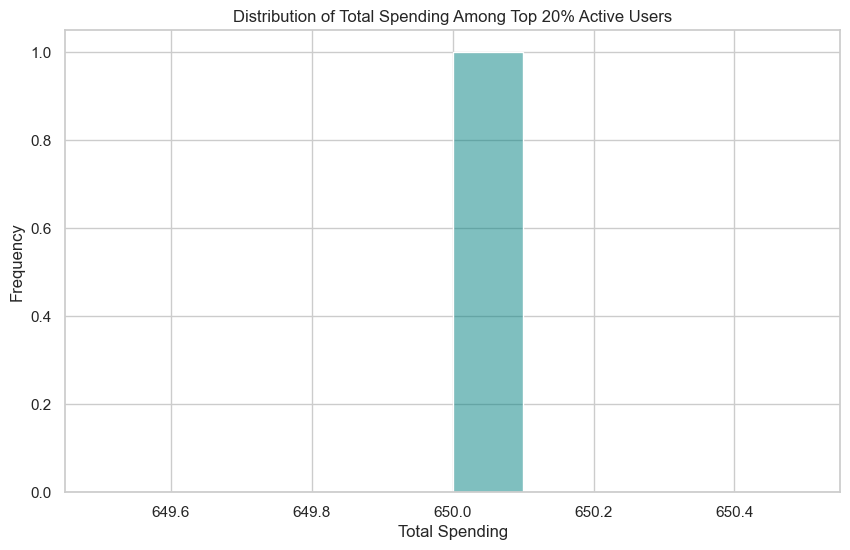

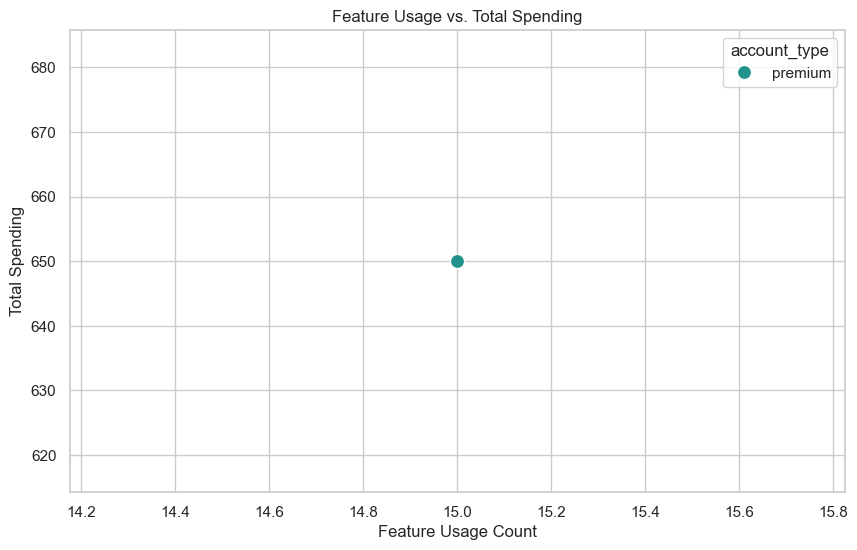

C:\Users\apcas\AppData\Local\Temp\ipykernel_37920\3549395339.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='communication_preference', data=df_segmented, palette='pastel')


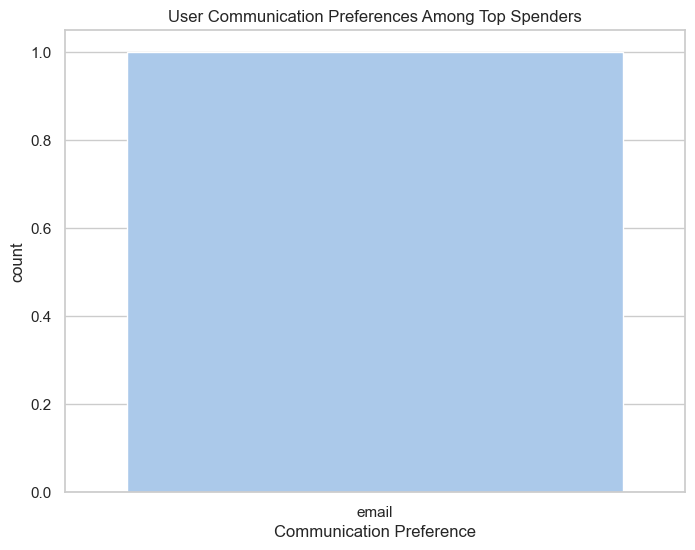

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# -------------------------
# 1. Create Sample DataFrames
# -------------------------
# Sample data for user_activity
user_activity_data = {
    "user_id": ["U1", "U2", "U3", "U4", "U5"],
    "last_login_date": [
        (datetime.now() - timedelta(days=5)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=10)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=40)).strftime('%Y-%m-%d'),  # inactive
        (datetime.now() - timedelta(days=2)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=20)).strftime('%Y-%m-%d')
    ],
    "feature_usage_count": [10, 5, 2, 8, 15],
    "account_type": ["premium", "free", "free", "premium", "premium"]
}
df_user_activity = pd.DataFrame(user_activity_data)

# Sample data for transactions
transactions_data = {
    "transaction_id": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "user_id": ["U1", "U2", "U1", "U3", "U4", "U4", "U5", "U5", "U2", "U1"],
    "transaction_date": [
        (datetime.now() - timedelta(days=7)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=6)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=3)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=50)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=2)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=15)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=8)).strftime('%Y-%m-%d'),
        (datetime.now() - timedelta(days=2)).strftime('%Y-%m-%d')
    ],
    "amount": [200, 50, 300, 20, 400, 200, 600, 50, 100, 100],
    "platform": ["web", "mobile", "web", "mobile", "web", "mobile", "web", "mobile", "web", "mobile"]
}
df_transactions = pd.DataFrame(transactions_data)

# Sample data for user_preferences
user_preferences_data = {
    "user_id": ["U1", "U2", "U3", "U4", "U5"],
    "communication_preference": ["email", "sms", "email", "push", "email"],
    "interface_theme": ["dark", "light", "light", "dark", "dark"],
    "notification_settings": ["enabled", "enabled", "disabled", "enabled", "enabled"]
}
df_user_preferences = pd.DataFrame(user_preferences_data)

# -------------------------
# 2. Set Up In-Memory SQLite Database and Write Tables
# -------------------------
conn = sqlite3.connect(":memory:")

df_user_activity.to_sql("user_activity", conn, index=False, if_exists="replace")
df_transactions.to_sql("transactions", conn, index=False, if_exists="replace")
df_user_preferences.to_sql("user_preferences", conn, index=False, if_exists="replace")

# -------------------------
# 3. Define the SQL Query to Segment Users
# -------------------------
sql_query = """
WITH spending AS (
    SELECT 
        user_id, 
        SUM(amount) AS total_spent
    FROM transactions
    GROUP BY user_id
),
ranked_spenders AS (
    SELECT 
        user_id,
        total_spent,
        PERCENT_RANK() OVER (ORDER BY total_spent DESC) AS spend_rank
    FROM spending
)
SELECT 
    ua.user_id,
    ua.last_login_date,
    ua.feature_usage_count,
    ua.account_type,
    rs.total_spent,
    up.communication_preference,
    up.interface_theme,
    up.notification_settings
FROM user_activity ua
JOIN ranked_spenders rs ON ua.user_id = rs.user_id
JOIN user_preferences up ON ua.user_id = up.user_id
WHERE ua.last_login_date >= date('now','-30 days')
    AND rs.spend_rank <= 0.20
ORDER BY rs.total_spent DESC;
"""

# -------------------------
# 4. Execute the SQL Query and Load Results into a DataFrame
# -------------------------
df_segmented = pd.read_sql_query(sql_query, conn)
conn.close()

# Convert last_login_date column to datetime type
df_segmented['last_login_date'] = pd.to_datetime(df_segmented['last_login_date'])

print("Segmented Users:")
print(df_segmented)

# -------------------------
# 5. Create Visualizations Based on the Segmented Data
# -------------------------
sns.set_theme(style="whitegrid")  # Set a nice Seaborn style

# Visualization 1: Histogram of Total Spending
plt.figure(figsize=(10, 6))
sns.histplot(df_segmented['total_spent'], bins=10, kde=True, color='teal')
plt.xlabel("Total Spending")
plt.ylabel("Frequency")
plt.title("Distribution of Total Spending Among Top 20% Active Users")
plt.show()

# Visualization 2: Scatter Plot of Feature Usage Count vs. Total Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_segmented,
    x='feature_usage_count',
    y='total_spent',
    hue='account_type',
    palette='viridis',
    s=100
)
plt.xlabel("Feature Usage Count")
plt.ylabel("Total Spending")
plt.title("Feature Usage vs. Total Spending")
plt.show()

# Visualization 3: Count Plot of Communication Preference
plt.figure(figsize=(8, 6))
sns.countplot(x='communication_preference', data=df_segmented, palette='pastel')
plt.xlabel("Communication Preference")
plt.title("User Communication Preferences Among Top Spenders")
plt.show()


Discussion Points:

1) How were percentile calculations handled?
    There were two calculations created before the execution of the main query.  One to calculate the total sum of amount spent for a user.  And another to calculate the ranking for the user over the dataset.

2) What approaches to date filtering were used?
    The approach for date filtering was in the where clause of the main SQL query where it ensures that the last login date is >= the past 30 days as that was the criteria for an Active user.

3) How was the query optimized, CTE, subquery etc…?
    It was optimized by doing two calculations before the actual main query and create temporary tables to be called to, which would put less stress on the system then doing all the calculations in time.